# SENTIMENT ANALYSIS OF OPAY APP REVIEWS
- BY: GBADAMOSI OLUWASEYI EMMANUEL
- FINAL YEAR PROJECT

# INTRODUCTION 

Sentiment analysis, is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text. This is a popular way for organizations to determine and categorize opinions about a product, service or idea. It involves the use of data mining, machine learning (ML) and artificial intelligence (AI) to mine text for sentiment and subjective information. In recent years, several methods of sentiment analysis have been developed for many domains such as the health sector both in terms of disease and health services, entertainment fields such as film reviews, music, to the political field.
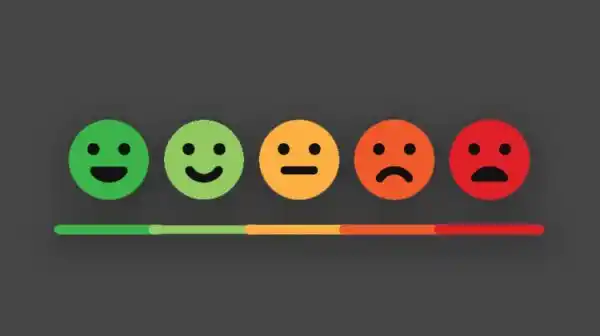

## AIM AND OBJECTIVES OF THE STUDY

The aim of this project is to analyze the sentiments about opay applications in the Google Play Store and to determine the level of user satisfaction based on comments in the Google Play Store review column and to determine the level of service success, shortcomings and how to further improve the app for better customer experience based on community sentiments. The objectives include:
1. Classifying the extracted data using Random forest as a supervised data mining algorithm to predict good and bad reviews.
2. To analyzing the reviews of users on opay app to extract sentiment 
3. To get valuable insight on the level of app success, shortcomings and how to further improve the app for better customer experience

## RESULT SUMMARY

> The trained random forest classification model had an accuracy of 86%, precision of 87%, recall of 86% and average cross validated ROC AUC of 90% indicating a relatively good model. The most important features were the 4 sentiment scores (positive, compound, neutral and negative), word and character counts, a few document vectors, and the words great and easy (from TD-IDF). The model was then applied to the neutral reviews to try and categorize the review into positive or negative. 
- The RFC model predicted 564 reviews as good incorrectly and 445 review as bad incorrectly.The PR curve shows the calculated precision and recall at various threshold values. The precision values for our model remain relatively stable at each threshold AP= 0.95 
- After extracting sentiment from the reviews using vader module, positive reviews had the highest number of 73% while negative reviews had the lowest number of 27%. According to the number of reviews positive reviews had the highest number of reviews which means people are satisfied with the app but we can’t base the app success on only the positive reviews we have to strike a balance in order to get good insight, 
- App success: Result shows that users are happy and like the app because it is fast, efficient and easy to use. Some key functions that users enjoyed were Oride service, electricity bill payment, airtime fill up, TV subscriptions amidst other services.
- Shortcoming: many of users complained of experiencing technical issues of the app not able to connect to the internet on their mobile phones, also geo-location for oride service not accurate causing late arrival of riders , riders misbehave, agents Unable get commission on some services and charges on transaction is high.
- Improvements: reviews suggest the use of debit card, POS to receive money from other banks, adding daily subscription to the data package, decrease the airtime limit, and set geo-location to have high accuracy, need to scale backend server and make the response time of the server more efficient.


In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_curve, auc
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.utils.fixes import signature
from nltk.corpus import wordnet, stopwords
from nltk import pos_tag, ngrams
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.collocations import * #N-grams
import nltk.collocations #N-grams
from collections import Counter #N-grams
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from wordcloud import WordCloud
import string
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib import rc
import missingno as msno #missmap
import numpy as np
import pandas as pd
import os

In [50]:
#Set home drive
os.chdir("C:/Users/Oluwaseyi/Documents/final year project code/sentiment-analysis-on-opay-app/")#set drive
pd.set_option('display.max_colwidth', -1) #set column width for better string viewing

 
# Exploratory Data Analysis (EDA)

This data was provided by a third party Appfollow. To perform similar analysis, a sample data set obtained from appfollow website. 

## Data Description

The app store data used here contains 44,490 observations and 26 colums. Each customer review is composed of Date, AppID, AppName,Language,Version, Version Code, Rating, Title, Review, Translated title, Translated  review, Reply Date, Developer Reply, User, Device, Device Type,Tags, Categories, Notes, Likes, Dislikes, Link, Permalink, AF Link.            

In [51]:
#loading the data and initial preview
df = pd.read_csv("reviews_googleplay_1591435589.csv", encoding = "ISO-8859-1") #loading the data
print('Dimensions:',df.shape) #call data dimensions
df.dtypes
df.head()

Dimensions: (44490, 26)


,Date,AppID,AppName,Language,Version,VersionCode,OS,Author,Rating,Title,...,Device,Device Type,Tags,Categories,Notes,Likes,Dislikes,Link,Permalink,AF Link
0,6/4/2018 6:48,team.opay.pay,"OPay - OMall, ORide, Airtime, Transfer & more",en,NaN,NaN,NaN,Ethel Mwanyalo,5,NaN,...,NaN,NaN,NaN,NaN,NaN,27.0,NaN,https://play.google.com/apps/publish?#ReviewDetailsPlace:p=team.opay.pay&reviewid=gp:AOqpTOEy02MSxqye6GhYyG7_OVRUK3vhSj-jr6GuSFyi6o_omsZrp64JUxjFIrUZI9u-23u64nMKqroe_NWyxRE,https://appfollow.io/gp/975743/review/350632683,https://watch.appfollow.io/apps/opay/reviews/232472?review_id=350632683
1,6/11/2018 10:35,team.opay.pay,"OPay - OMall, ORide, Airtime, Transfer & more",en,NaN,NaN,NaN,Abiola Daramola,5,NaN,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,https://play.google.com/apps/publish?#ReviewDetailsPlace:p=team.opay.pay&reviewid=gp:AOqpTOF8c3BI-ioPC5qyUVslKPHdUM3PKXZRJMuDb1yLto46CeFDw8TBiu9VayVroByOUKymsSTGrpFbAAh4I9A,https://appfollow.io/gp/975743/review/350632684,https://watch.appfollow.io/apps/opay/reviews/232472?review_id=350632684
2,6/13/2018 12:06,team.opay.pay,"OPay - OMall, ORide, Airtime, Transfer & more",en,NaN,NaN,NaN,Yahaya Saminu,5,NaN,...,NaN,NaN,NaN,NaN,NaN,16.0,NaN,https://play.google.com/apps/publish?#ReviewDetailsPlace:p=team.opay.pay&reviewid=gp:AOqpTOGNhES828YmHzvuSDyjyTUjZeWToebdLK9lQhklTuyiVR1vVL2PEZKoz1BgkzGu1Gac9XsrsenbQX8-4ho,https://appfollow.io/gp/975743/review/350632685,https://watch.appfollow.io/apps/opay/reviews/232472?review_id=350632685
3,6/15/2018 11:28,team.opay.pay,"OPay - OMall, ORide, Airtime, Transfer & more",en,NaN,NaN,NaN,A Google user,5,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,https://play.google.com/apps/publish?#ReviewDetailsPlace:p=team.opay.pay&reviewid=gp:AOqpTOHbFu6zIUb0PRTaLIDvL_FbDjXQm1wTm3J9lrBSLLQKtz4E8SQn_U-vA8WD4-ka4Fd1LVBCJDbKl-pzNZY,https://appfollow.io/gp/975743/review/350632686,https://watch.appfollow.io/apps/opay/reviews/232472?review_id=350632686
4,6/18/2018 11:40,team.opay.pay,"OPay - OMall, ORide, Airtime, Transfer & more",en,NaN,NaN,NaN,Abena Music,5,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,NaN,https://play.google.com/apps/publish?#ReviewDetailsPlace:p=team.opay.pay&reviewid=gp:AOqpTOECDyuG1tMAErNeSXpClJb2KobbjnGS3Mz0b1-YU6lw2ovjpMlgiCyGydXgMsj_zQCZnllMQaOIHMt8uuk,https://appfollow.io/gp/975743/review/350632687,https://watch.appfollow.io/apps/opay/reviews/232472?review_id=350632687


## Data Integrity

We can see that the fields TranslatedTitle, TranslatedReview, User, Device, DeviceType, Tags, Version, Version Code, os, Title, Categories and Notes have no data. These can be removed during the data cleaning phase. Additionally, ReplyDate, DeveloperReply, Title and Author are quite sparsely populated fields.

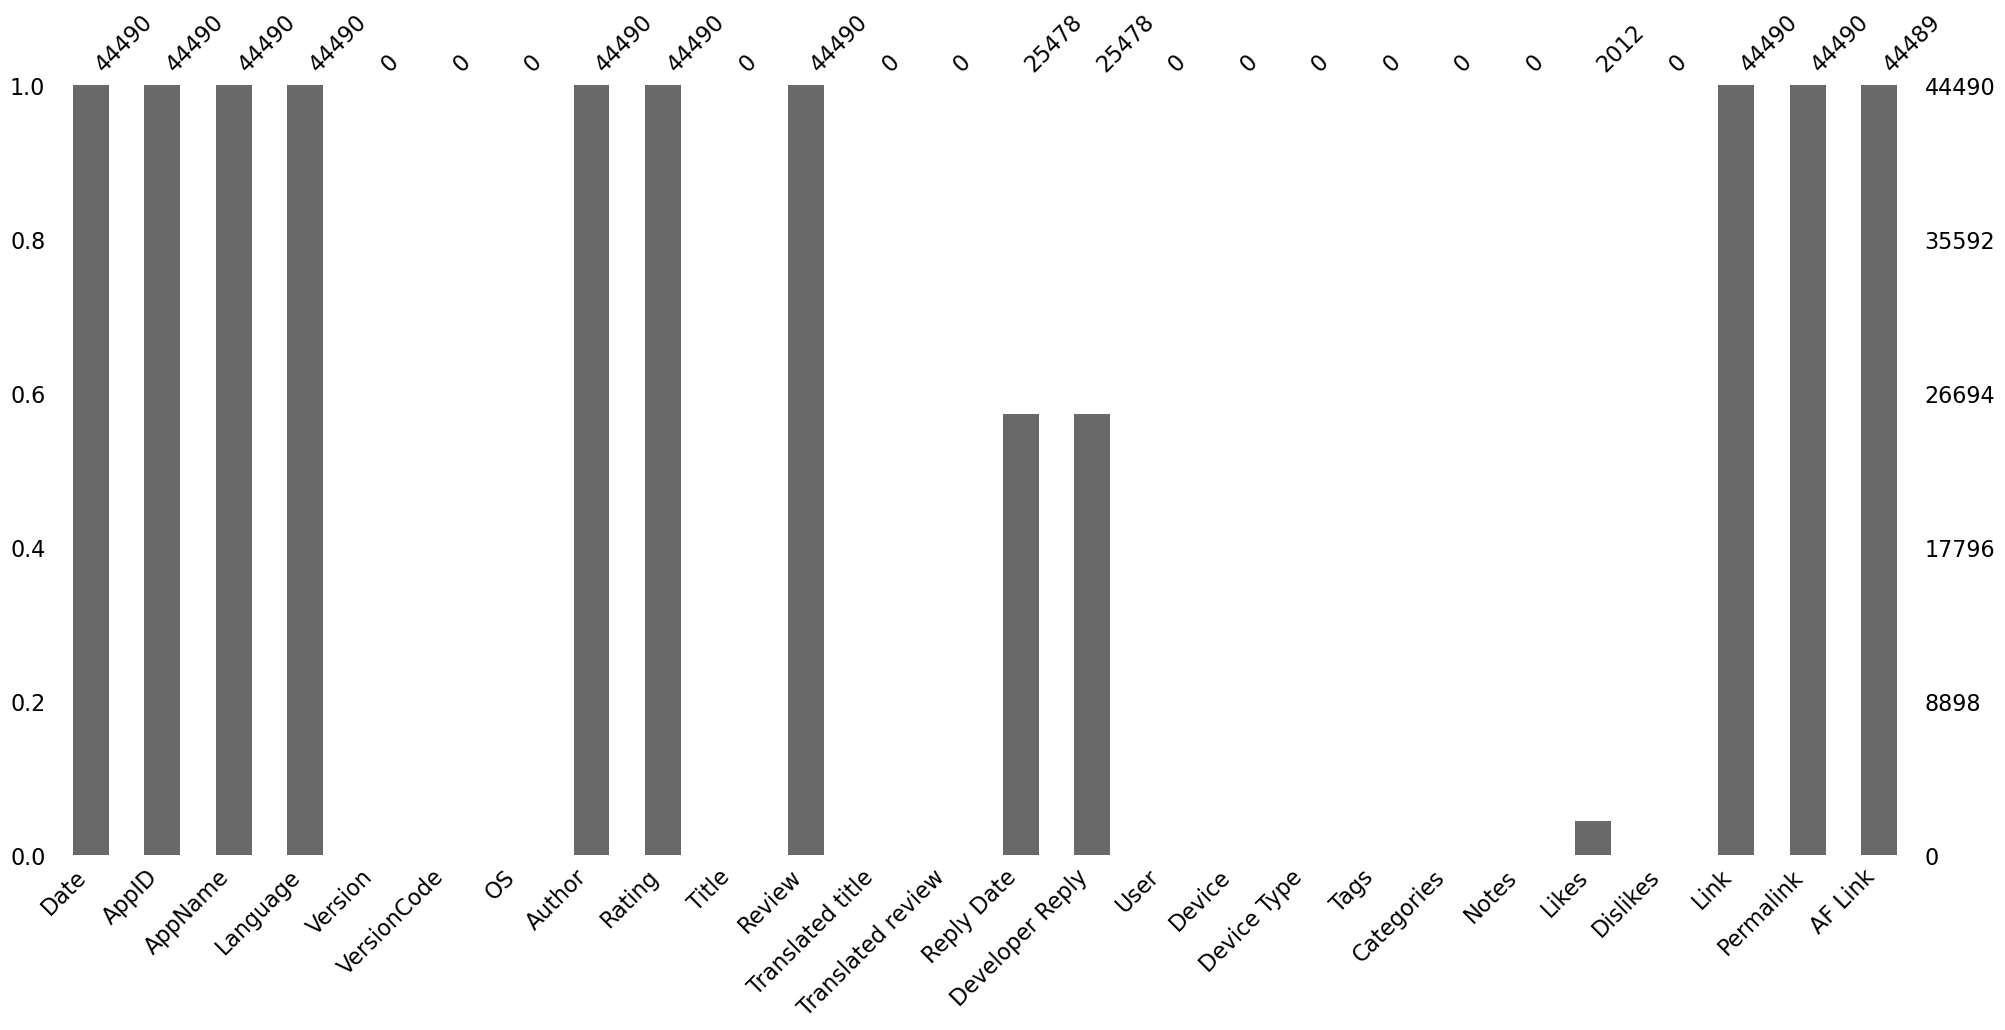

In [52]:
msno.bar(df)

## Initial Data Cleaning

To simplify the data, features that are less meaningful to our analysis or are too scarcely populated are removed from the dataset.<br>

>Author, User  – Removed unique identifiers. <br>
>AppName, AppID - is in a cleaner format and more consistent. but of no meaning to the analysis . <br>
>Language – The reviews should all be in English so this field is not meaningful <br>
>TranslatedTitle, TranslatedReview, User, Device, DeviceType, ReplyDate, DeveloperReply, Tags, Notes,Version, Version Code, os, Title, Categories  – too scarcely populated or have no data to provide any meaningful insight. <br>
>Link – Removed as outside of the scope of this project, maybe a field of interest for further analysis. <br>.


In [53]:
df = df.drop(["Author","AppName","Version","VersionCode","OS","Language","Translated title", "Translated review", "Reply Date","Developer Reply","User","Device","Device Type","Tags","Notes","Link","Likes","Dislikes","Permalink","AF Link","Categories","Title"], axis=1)
df['AppID']=df['AppID'].replace({'team.opay.pay': 'Opay'})
print('Dimensions:',df.shape)
df.head()

Dimensions: (44490, 4)


,Date,AppID,Rating,Review
0,6/4/2018 6:48,Opay,5,Great stuff loading
1,6/11/2018 10:35,Opay,5,Good
2,6/13/2018 12:06,Opay,5,Nice
3,6/15/2018 11:28,Opay,5,Cool app
4,6/18/2018 11:40,Opay,5,How do it work to earn..pls urgently..


In [54]:
#Total number rows and columns
df.shape

(44490, 4)

In [55]:
# remove duplicates/ for every duplicate we will keep only one row of that type. 
df.drop_duplicates(subset=['Rating','Review'],keep='first',inplace=True) 
print(df.shape)
df.head()

(26535, 4)


,Date,AppID,Rating,Review
0,6/4/2018 6:48,Opay,5,Great stuff loading
1,6/11/2018 10:35,Opay,5,Good
2,6/13/2018 12:06,Opay,5,Nice
3,6/15/2018 11:28,Opay,5,Cool app
4,6/18/2018 11:40,Opay,5,How do it work to earn..pls urgently..


In [56]:
df["Reviews"]=df["Review"]
df.drop(['Review'],axis=1,inplace=True)
df.head()

,Date,AppID,Rating,Reviews
0,6/4/2018 6:48,Opay,5,Great stuff loading
1,6/11/2018 10:35,Opay,5,Good
2,6/13/2018 12:06,Opay,5,Nice
3,6/15/2018 11:28,Opay,5,Cool app
4,6/18/2018 11:40,Opay,5,How do it work to earn..pls urgently..


## DATA PREPARATION AND CLEANING

My initial attempts at lemmatizing the review text were unsuccessful as a spot check of the corpus showed many words that were not transformed to their base form. Upon further research, it was noted that the default setting for the lemmatization module in NTLK wordnet was ‘noun’ resulting in the transformation of only noun words. To resolve this, the function below defines the word type based on the position tag obtained from the NLTK pos_tag module (the pos_tag module is applied in the clean_text function in the following section)

In [57]:
def get_tag(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

The clean_text function defined below applies the following transformations: <br>
> 1) Change all words to lower case (lemmatization does not work on capitals as they are assumed to be proper nouns). <br>
> 2) Tokenize the text and remove punctuation. <br>
> 3) Remove numeric values. <br>
> 4) Remove stop words (using pre-built stop word dictionary). <br>
> 5) Remove any empty tokens. <br> 
> 6) Apply a position tag to each word and define it based on the previously defined get_tag function as adjective, noun, verb, or adverb.<br>
> 7) Lemmatize the words. <br>
> 8) Remove any single letter words resulting from lemmatization.<br>

In [58]:
import re
def clean_text(text):
    text = text.lower() #change all text to lower case
    text = re.sub(r'\s*(?:https?:\/\/)?[\w.-]+(?:\.[\w.-]+)+[\w\-._~:/?#[\]@!\$&\'\(\)\*\+,;=.]+','',text)
    text = [word.strip(string.punctuation) for word in text.split(" ")] #tokenize and remove punctuation
    text = [word for word in text if not any(c.isdigit() for c in word)] #remove numeric values
    stop = stopwords.words('english') #call english stop word dictionary
    text = [x for x in text if x not in stop]#remove stop words
    text = [t for t in text if len(t) > 0] #remove empty tokens
    pos_tags = pos_tag(text)#apply position tag to text
    text = [WordNetLemmatizer().lemmatize(t[0], get_tag(t[1])) for t in pos_tags] #apply pos_tag function and lemmatize text
    text = [t for t in text if len(t) > 1]# remove single letter words
    text = " ".join(text) #combine
    return(text)
#create new column with cleaned text
df["reviews_clean"] = df["Reviews"].apply(lambda x: clean_text(x))

In [59]:
#Text Before Text Cleaning
print('Before Text Cleaning')
df['Reviews'].head()

Before Text Cleaning


0    Great stuff loading                   
1    Good                                  
2    Nice                                  
3    Cool app                              
4    How do it work to earn..pls urgently..
Name: Reviews, dtype: object

In [60]:
#Text Before Text Cleaning
print('After Text Cleaning')
df['reviews_clean'].head()

After Text Cleaning


0    great stuff loading
1    good               
2    nice               
3    cool app           
4    work urgently      
Name: reviews_clean, dtype: object

In [61]:
# Drop all columns that are blank as a results of the text cleaning function. Lost 176 rows.
print(df.shape)
df = df[df['reviews_clean'].map(len) > 0]
print(df.shape)

(26535, 5)
(26359, 5)


## Plot: Distribution of Reviews by Rating

This plot views the distributions of reviews across all ratings. We can see that the number of positive reviews has the highest number of reviews, causing  our dataset to be imbalanced, followed by negative reviews having less than 6000 comments.

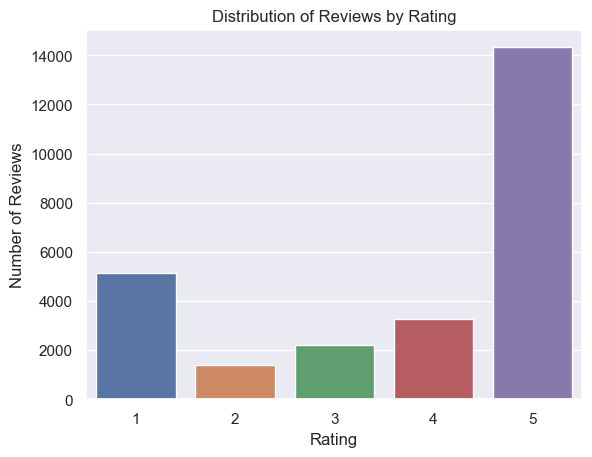

In [62]:
sns.set(style="darkgrid")
bx = sns.countplot(x = "Rating", data=df)
bx.set(xlabel='Rating', ylabel='Number of Reviews',title='Distribution of Reviews by Rating')
plt.show()

## Most Frequently Occuring Words

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

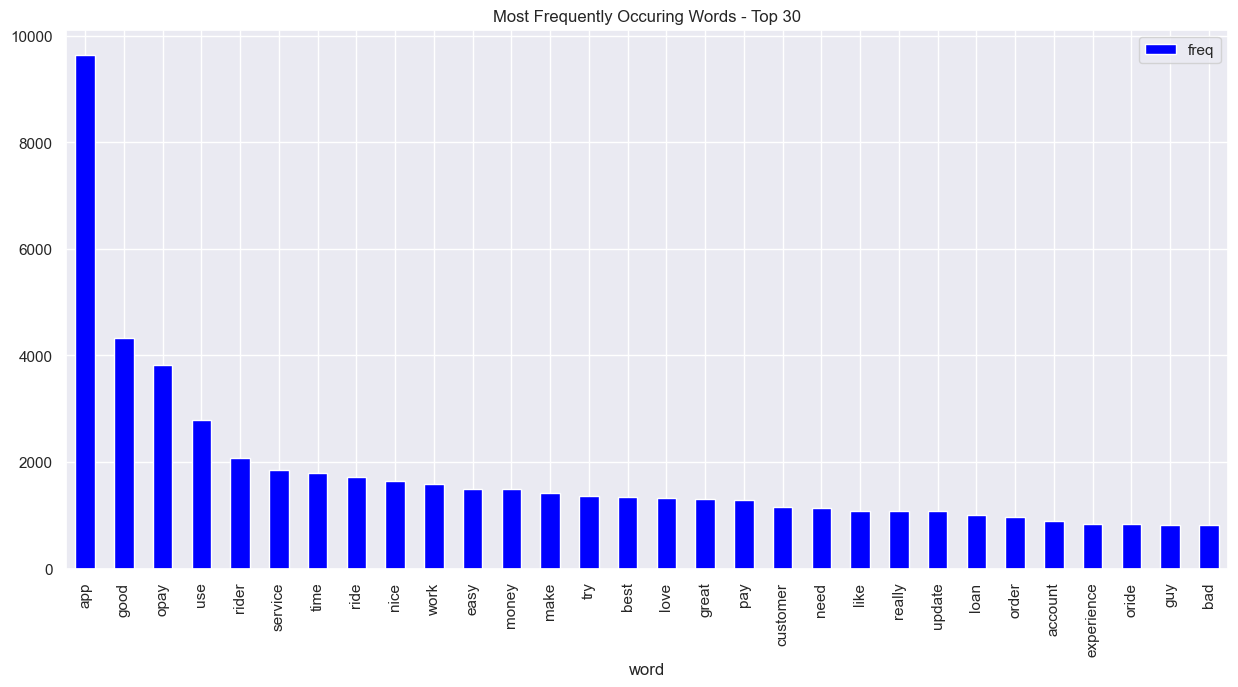

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words= cv.fit_transform(df['reviews_clean'].values.astype('U'))

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [64]:
dfn= df[df['reviews_clean'].str.contains("app")]
#dfn_pg['Reviews'].head(10)
dfn['reviews_clean'].head(10)

3     cool app                                                                                                       
6     apply loan                                                                                                     
11    useless ewallet balance even reflect app can't buy \nairtime pay bill i'm fear money pump name \nof top ewallet
14    least let get update work tire update app \ndoesn't get transaction execute                                    
16    think best app e-wallet transfer work perfectly \nin mine                                                      
32    best app sow far please need customer phone number                                                             
35    good app credit debit also use buy credit data                                                                 
36    can't send money bank account use app top account cant send money bad                                          
40    good app user friendly                            

## FEATURE ENGINEERING

### Sentiment Analysis

The Vader module from NLTK was the model selected for sentiment analysis. The Vader module uses a prebuilt lexicon of words to calculate a sentiment score. This module was selected for sentiment analysis because the module takes into consideration the context of the text. The module returns 4 values: positivity score, neutrality score, negativity score and summary score.


In [65]:
sid = SentimentIntensityAnalyzer()
#calculates the negativity,  neutrality, positivity and overall sentiment scores
df["sentiments"] = df["reviews_clean"].apply(lambda x: sid.polarity_scores(x))
#drop sentiment column and add the 4 sentiment scores as separate features to primary dataset
df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)
df[['AppID','Rating','reviews_clean','neg','neu','pos','compound']].head(10)

,AppID,Rating,reviews_clean,neg,neu,pos,compound
0,Opay,5,great stuff loading,0.0,0.328,0.672,0.6249
1,Opay,5,good,0.0,0.000,1.000,0.4404
2,Opay,5,nice,0.0,0.000,1.000,0.4215
3,Opay,5,cool app,0.0,0.303,0.697,0.3182
4,Opay,5,work urgently,0.0,1.000,0.000,0.0000
5,Opay,2,unable either send receive cash seem like fully \nsupported,0.0,0.579,0.421,0.6240
6,Opay,5,apply loan,0.0,1.000,0.000,0.0000
7,Opay,1,can't get access code verify phone number,0.0,0.822,0.178,0.0772
8,Opay,4,love,0.0,0.000,1.000,0.6369
9,Opay,4,can't find option put amount want recharge,0.0,0.822,0.178,0.0772


The graph below shows the compound sentiment calculated by Vader distributed by good and bad reviews. We can see that good reviews are mostly considered very positive by Vader, whereas, bad reviews are more dispersed with a slightly higher proportion of negative reviews with negative sentiment scores. The only variation to this trend is the slight peak around the neutral compound score (zero) for both negative and positive reviews.

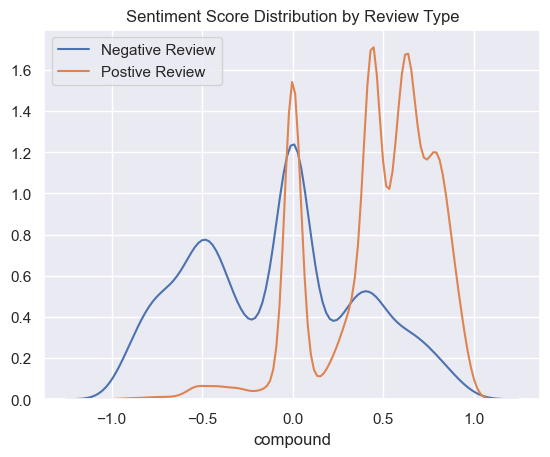

In [66]:
for x in [1, 5]:
    subset = df[df['Rating'] == x]
    if x > 3:
        label = "Postive Review"
    else:
        label = "Negative Review"    
    sns.distplot(subset['compound'], hist = False, label = label).set_title('Sentiment Score Distribution by Review Type')


### Word and Character Count Features

Two new features are created by extracting the number of characters and number of words per review. Log transformation is applied to pull in outliers.


In [67]:
df["num_chars"] = df["reviews_clean"].apply(lambda x: len(x))
df["num_words"] = df["reviews_clean"].apply(lambda x: len(x.split(" ")))
#log transformation
df['num_chars1'] = np.log(df['num_chars'])
df['num_words1'] = np.log(df['num_words'])

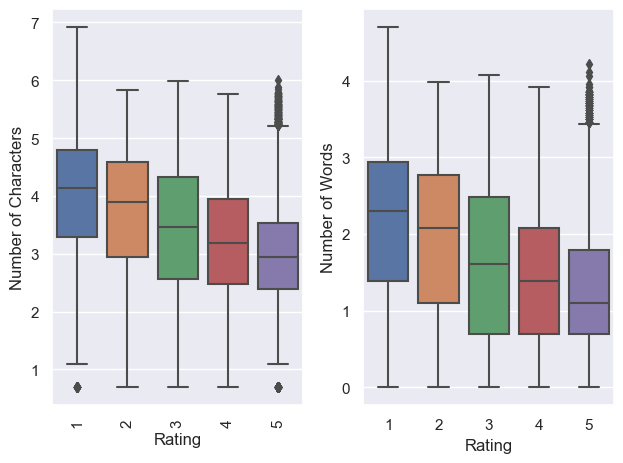

In [68]:
x1 = df['Rating']
x2 = df['Rating']
y1 = df['num_chars1']
y2 = df['num_words1']
#plot num_chars by rating in column 1
plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
g = sns.boxplot(x1, y1)
g.set(xlabel='Rating', ylabel='Number of Characters',title='')
#plot num_words by rating in column 2
plt.subplot(1, 2, 2)
g = sns.boxplot(x2, y2)
g.set(xlabel='Rating', ylabel='Number of Words',title='')

plt.tight_layout()
plt.show()

We can see a trend forming from the boxplot below, where users tend to leave longer reviews for negative ratings (<3) and neutral ratings (=3) and shorter reviews good review (>3). This may be a useful feature for our predictive models

### Doc2Vec Feature Creation

The doc2vec method from the Genism module is used to generate document vectors for each cleaned review. The doc2vec module uses a modified word2vec model with the addition of a document unique vector, which numerically represents the document. This provides a document-concept representation of each review. This feature is important for training our model since similar texts should have similar vector representations. We first start by creating doc2vec vector columns and then proceed to train the model. The model is then applied to the text to transform each review into vector data before being combined with our original dataframe.

Warning Message to install compiler to speed up genism is not necessary for the size of data used in this notebook. For larger data, a compiler would be recommended as this model took roughly 26 minutes to run.

In [69]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df["reviews_clean"].apply(lambda x: x.split(" ")))]
# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=6, window=2, min_count=1, workers=4)
# transform each document into a vector data
df_vector = df["reviews_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
df_vector.columns = ["df_vector_" + str(x) for x in df_vector.columns]
df = pd.concat([df, df_vector], axis=1)

### Term Frequency - Inverse Document Frequency

The word frequency is calculated using the TF-IDF model. In addition to just counting word frequency, this model computes the relative importance of each word based on the frequency of occurrence of the word in each text. A column is generated for every word which occurs in a minimum of 10 different documents to provide a relative filter on importance and to remove size. This can be adjusted to fine tune the predictive models.


In [70]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(df["reviews_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)

### Define Good and Bad Reviews

The final feature created is to define a bad review ( rating < 3) by denoting it with 0 and all other ratings with 1. For the purposes of our model, the neutral reviews (rating of 3) are separated into another dataframe. Our dataset is relatively imbalanced with 73% good review and 27.0% bad reviews oversampling of our dataset would take care of the imbalanced to make it a balanced dataset.

In [71]:
df.shape

(26359, 1562)

In [72]:
df['label'] = np.where(df['Rating']<3, 0, 1)
#take lowest and highest rating
df_class = df[(df['Rating'] < 3) | (df['Rating'] > 3)]
df_neutral = df[(df['Rating'] == 3)].drop(['label'], axis=1)
df_class = df_class.sort_values(by=['Rating'])
print ("Dimenions:", df_class.shape)
print ("Good (1) vs Bad (0) split:" "\n",df_class["label"].value_counts(normalize = True))
df_class.groupby('label').count()

Dimenions: (24142, 1563)
Good (1) vs Bad (0) split:
 1    0.729268
0    0.270732
Name: label, dtype: float64


,Date,AppID,Rating,Reviews,reviews_clean,neg,neu,pos,compound,num_chars,...,word_ya,word_year,word_yes,word_yesterday,word_yet,word_yo,word_you,word_youth,word_zaria,word_zero
label,,,,,,,,,,,,,,,,,,,,,
0,6536,6536,6536,6536,6536,6536,6536,6536,6536,6536,...,6536,6536,6536,6536,6536,6536,6536,6536,6536,6536
1,17606,17606,17606,17606,17606,17606,17606,17606,17606,17606,...,17606,17606,17606,17606,17606,17606,17606,17606,17606,17606


## MODEL DEVELOPMENT

The Random Forest model (RF) is used to predict if a review is good or bad given the various features we created from the review text. The model will then be used on the neutral dataset (rating = 3) to categorize the reviews.


### Random Forest Classifier

The features used to train the RF model are selected and any columns to be ignored are defined. The dataset is then split into training and test datasets.

In [73]:
# feature selection
label = "label"
ignore_cols = [label, "Reviews", "reviews_clean", "Date", "AppID","Rating"]
features = [c for c in df_class.columns if c not in ignore_cols]
# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_class[features], df_class[label], test_size = 0.3, random_state = 42)

The resultant dataset for training is 16,899 rows x 1,558 columns and the test dataset is 7,243 rows x 1,558 columns. The 80/30 split was used as the app dataset is relatively small.

In [74]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (16899, 1557)
Training Labels Shape: (16899,)
Testing Features Shape: (7243, 1557)
Testing Labels Shape: (7243,)


## Balancing our label class

In [75]:
from imblearn.combine import SMOTETomek

In [76]:
os=SMOTETomek(1)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({1: 12319, 0: 4580})
The number of classes after fit Counter({1: 12157, 0: 12157})


imblearn is used to balance our label class using over sampling method so our model would not be biased when prediting and it would be able to predict well on new dataset. Our inital label class was 0: 12319, 1: 4580 after imblearn was used we had 0: 12312, 1: 12312 ratio 50:50 making it a balanced dataset.

The RF model is trained and cross validation is run to get a better overview of our model's performance..

In [77]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 150, random_state = 101)
rf.fit(X_train_ns,y_train_ns)
#Cross Validation Score
rfc_cv_score = cross_val_score(rf, df_class[features], df_class[label], cv=10, scoring= 'roc_auc')

we use pickle libiary to save our model to avoid retraining everytime we work on our dataset 

In [97]:
import pickle
with open('random_forest_classifier2.pickle','wb') as f:#saving our model
    pickle.dump(rf,f)

# pickle_in= open('random_forest_classifier1.pickle','rb')# opening our model
# clf= pickle.load(pickle_in)

### Model Evaluation

#### Confusion Matrix:
The RFC model predicted 564 reviews as good incorrectly and 445 review as bad incorrectly.

#### Classification Report:
The model achieved an average precision of 0.86, average recall of 0.86 and average accuracy of 0.86. We can see the model has higher precision when it comes to predicting positive review. This may be because the positive sentiment is one of most important feature for our model (refer to Feature Importance section).

#### Cross Validated (CV) AUC Score:
The model achieved an average CV AUC score of 0.90 which indicates a relatively good model.


In [79]:
print('CONFUSION MATRIX')
print(confusion_matrix(y_test, rf.predict(X_test)))
print('\n')
print (pd.crosstab(y_test, rf.predict(X_test), rownames=['Actual Result'], colnames=['Predicted Result']))
print('\n')
print('CLASSIFICATION REPORT')
print(classification_report(y_test, rf.predict(X_test)))
print('\n')
print('ALL AUC SCORES')
print(rfc_cv_score)
print('\n')
print('MEAN AUC SCORE: ', rfc_cv_score.mean())

CONFUSION MATRIX
[[1509  447]
 [ 544 4743]]


Predicted Result     0     1
Actual Result               
0                 1509  447 
1                 544   4743


CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1956
           1       0.91      0.90      0.91      5287

    accuracy                           0.86      7243
   macro avg       0.82      0.83      0.83      7243
weighted avg       0.87      0.86      0.86      7243



ALL AUC SCORES
[0.86523547 0.89011491 0.90828208 0.90139439 0.91017906 0.93943955
 0.93123252 0.91447937 0.8901036  0.87808333]


MEAN AUC SCORE:  0.9028544261567095


### Receiver Operating Characteristics (ROC) Curve
The trade-off between the true positive (TP) and false positive (FP) rate is shown in the Receiver Operating Characteristics (ROC) curve, and can be used to access the quality of the classifier used in our model. The distance between the ROC curve and the diagonal baseline indicates the reliability of the predictions from our model. The model is quite good with an area under curve (AUC) value of 0.91.

<div class="alert alert-block alert-info">
    Note: ROC is not a good indicator of model quality if the data is skewed towards a specific outcome as this could mute the FP and FN prediction rates (depending on the skewing of data). The app data review was relatively balanced in terms of the number of defined good or bad reviews, which give us some confidence in the ROC curve
    </div>

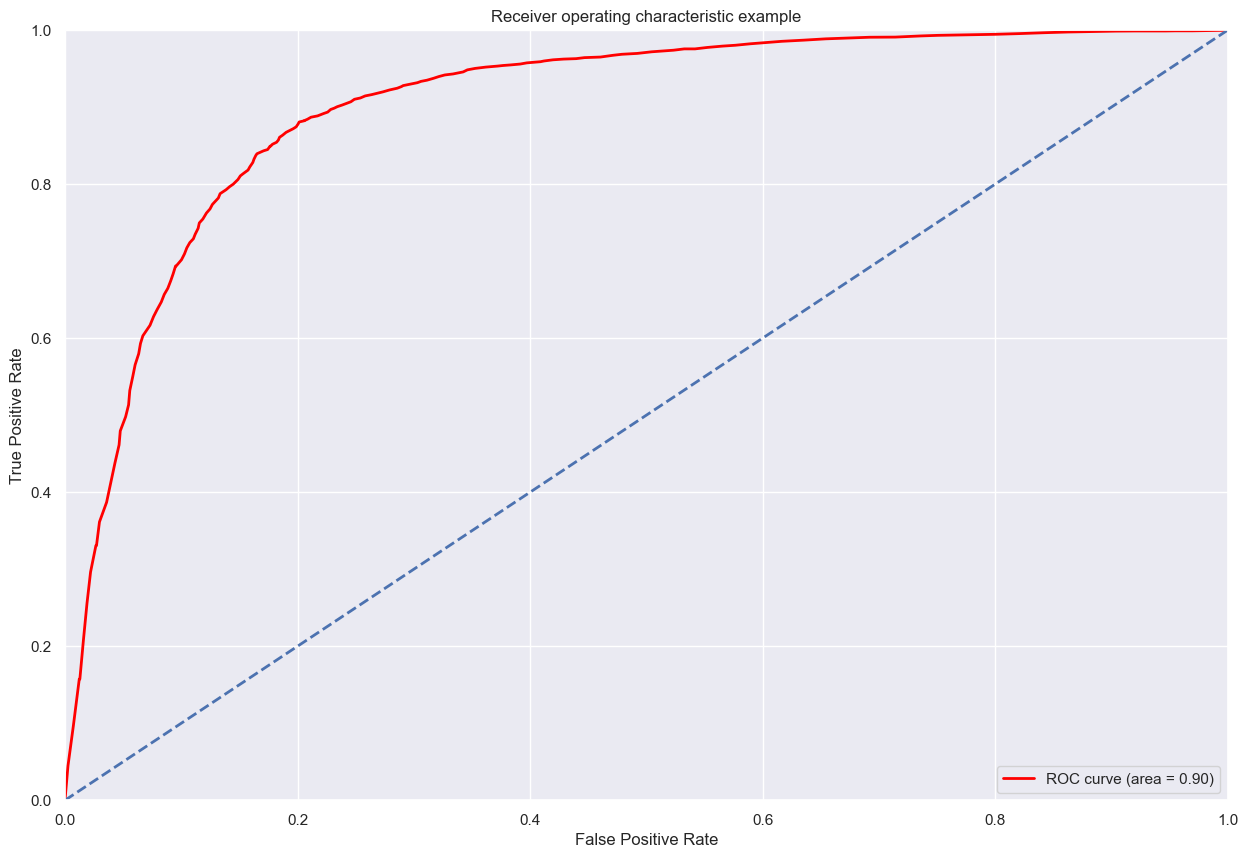

In [80]:
y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
roc_auc = auc(fpr, tpr)
plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Precision Recall Curve (Average Precision)

The PR curve shows the calculated precision and recall at various threshold values. The precision values for our model remain relatively stable at each threshold AP= 0.95. <br>
> Precision (positive prediction value) is the ratio of TP/ (TP + FP) <br>
> Recall (sensitivity) is the ratio of TP/(TP + FN) <br>

Note: The PR curve is useful for dataset that are imbalanced. 


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.95')

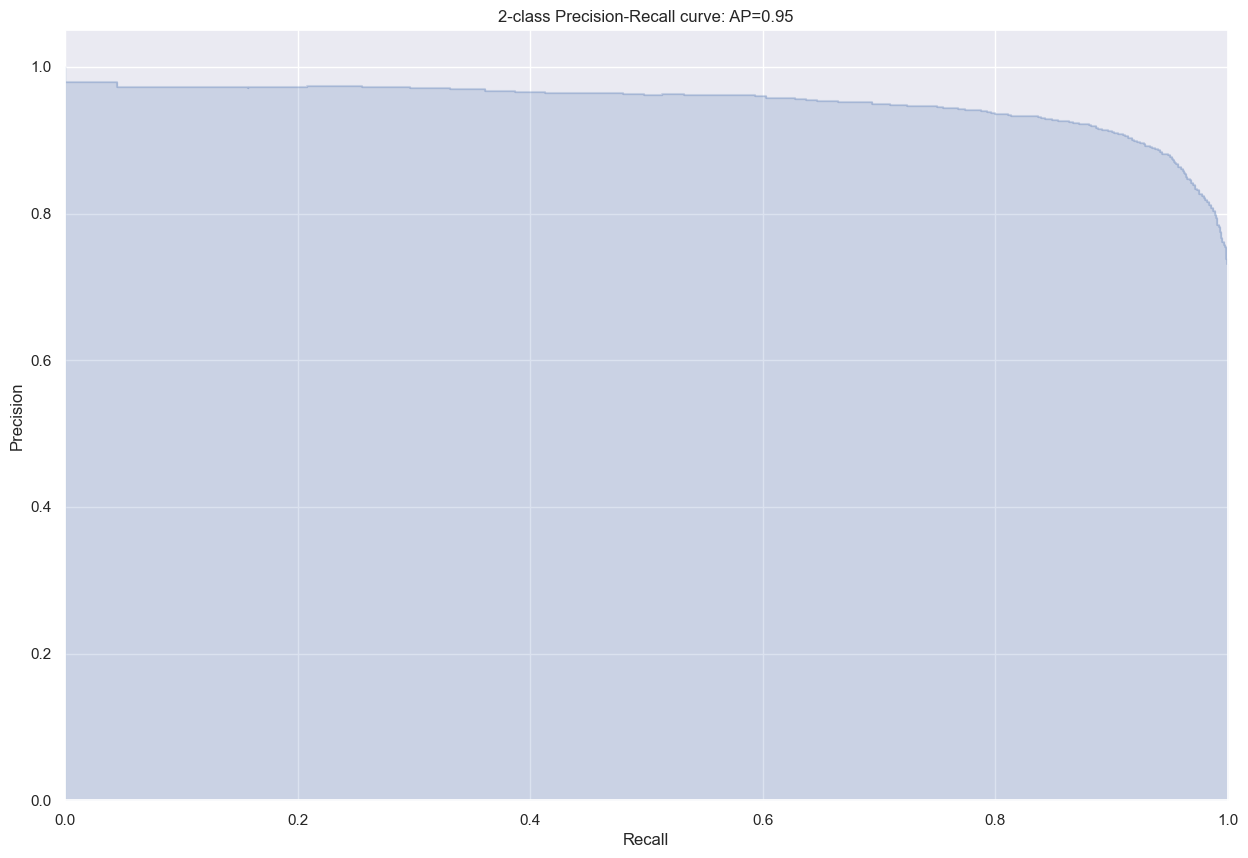

In [81]:
from funcsigs import signature
average_precision = average_precision_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

### Feature Importance

The most important features were the 4 sentiment scores generated by Vader,the doc2vec, the number of words and characters  features. Additionally, some words identified by TF-IDF such as “app” and "good" have fairly high importance, also may be correlated with the Vader “pos” scores and the words identified by TF-IDF such as "bad" may be correlated with the Vader “neg” scores, while the words dentified by TF-IDF such as "update","download", "can" may be correlated with the Vader “neu” scores.


In [82]:
# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
2,pos,0.076610
3,compound,0.070698
0,neg,0.044265
1,neu,0.041633
9,df_vector_1,0.033498
7,num_words1,0.031259
5,num_words,0.030501
6,num_chars1,0.029769
8,df_vector_0,0.029394
12,df_vector_4,0.027643


## Model Application

The RF model is applied to the dataset with ratings of 3 to determine if the reviews are good or bad.

In [83]:
df_temp = df_neutral[['Date','AppID','Rating','Reviews','reviews_clean']]
df_neutral = df_neutral.drop(['Reviews','reviews_clean','Date','AppID','Rating'], axis=1)
df_neutral['prediction'] = rf.predict(df_neutral)
df_neutral = pd.concat([df_temp.reset_index(drop=True),df_neutral.reset_index(drop=True)], axis=1)

## Preview Predicted Reviews

### Predicted Good Reviews

- The predicted good review preview seems to be less insightful, but this is somewhat expected given the high neutrality score noted during the Vader sentiment step. We see the model has failed to identify sarcasm in line 10: “Pay first before we rate the app”, “please how can i upgrade my account? i want to fund more than N10,000 to my account” and “The app is great. But please trying including an option for transaction cancelation. And the airtime limit of 200 is much, the data too please add daily subscription too …”, "want to be an agent how can I go about it ".

- In line 23:“The app is great. But please trying including an option for transaction cancelation. And the airtime limit of 200 is much, the data too please add daily subscription too …” the app lacks this features rating may improve if in further update this feature are added to the app

We noted that our model weighed positive words heavily in feature importance, which would explain these results. 


In [84]:
print('Predicted Good Reviews')
dfn_pred_good = df_neutral[(df_neutral['prediction'] == 1)]
dfn_pred_good['Reviews'].head(20)

Predicted Good Reviews


0     Good                                                                                                                                                                                                                                                                                                                                                           
2     Can I use these OPay and send money to Nigeria?                                                                                                                                                                                                                                                                                                                
3     Its ik                                                                                                                                                                                                                                                                                

### Predicted Bad Reviews

For the most part, the model seems to have done a pretty good job of categorizing the neutral reviews. Based on the preview we can see a couple of issues being highlighted by reviewers:
: Alert notification issues : Sender unable to receive alert from Opay as there receipt  <br>
- Lack of services: use of debit card, POS you uable to receive money from other banks <br>
-  Error in services: Referral not working, unable to login, takes time to connect to the internet (app is slow), app unable to connect to mobile network, geolocation service not accurate<br>
-  Errors in transactions: failed EFT, failed deposit, etc <br>
- Opay agents issues: Unable get commission on some services, charges on transcation is high <br>
- Oride service issues: late arrival time of divers, divers are unmannered, divers reject long distance trip, drivers charge off the book <br>

In [85]:
print('Predicted bad Reviews')
dfn_pred_bad = df_neutral[(df_neutral['prediction'] == 0)]
dfn_pred_bad['Reviews'].head(50)

Predicted bad Reviews


1      Pay first before we rate the app                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
4      We want d sender to be receiving alert from Opay as there receipt dat d money have getting to d receiver account                                                                                                                                                                                                                                                 

## REVIEW INSIGHTS

Now that we have our cleaned review data and have split the neutral ratings into good or bad categories. We can examine the text to see what insights we can gather.

### Word Cloud

The word cloud is a visual representation of word frequency. We can immediately identify some key app services that seem to be important to customers, such as easy, good and opay. This method is somewhat controversial as it is difficult to interpret relative size (and therefore frequency) of words. It is also difficult to interpret context when isolated words are presented, such as in the case of "time, service, ride and work" which can be positive or negative.


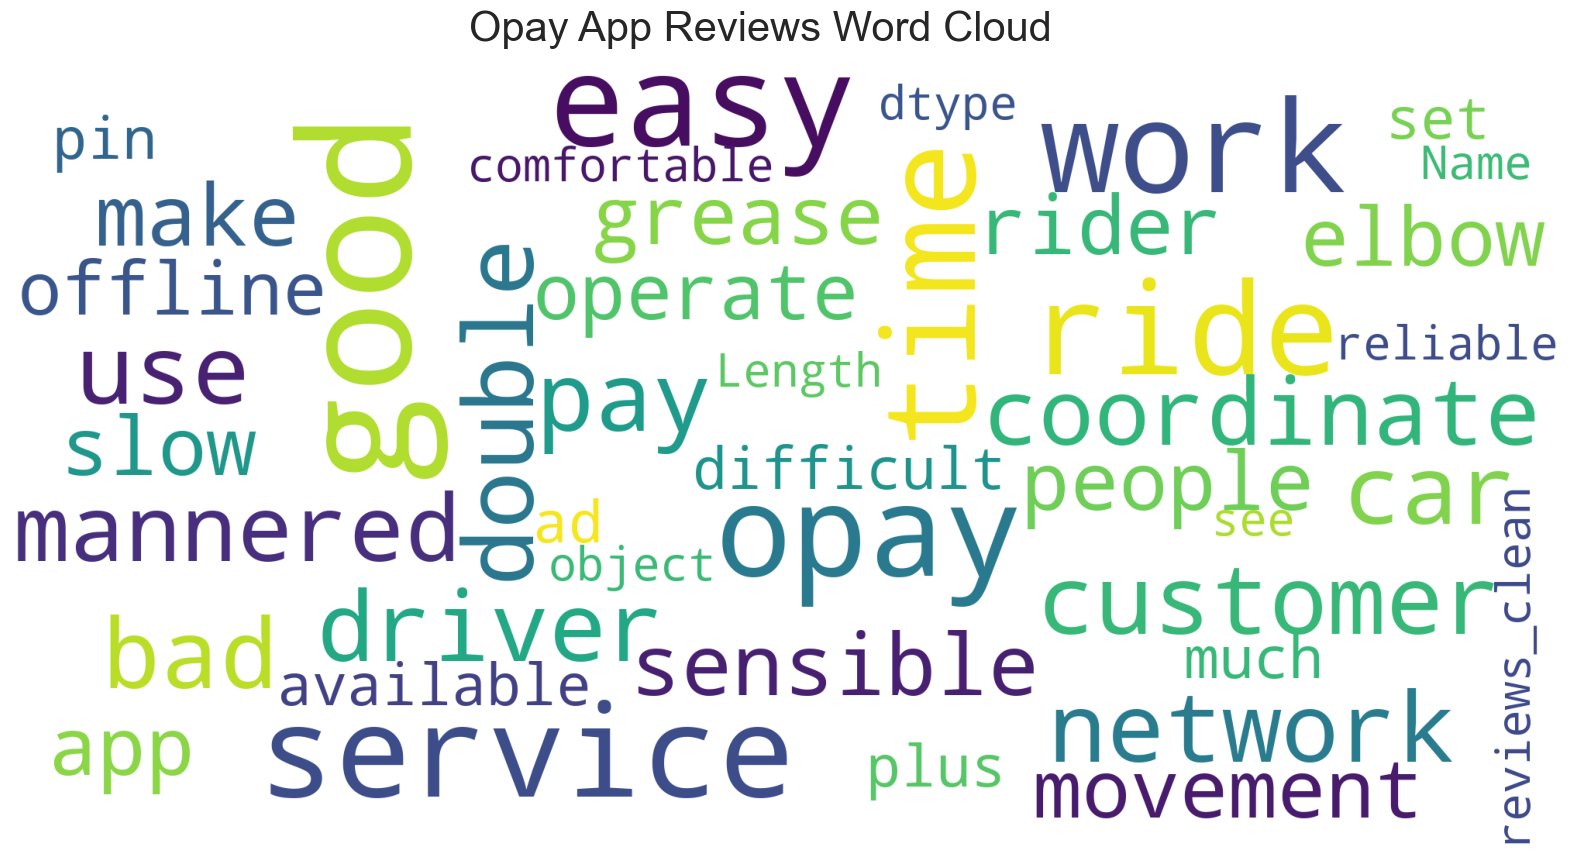

In [86]:
wd_title = 'Opay App Reviews Word Cloud'
def show_wordcloud(data, title = wd_title):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 5,
        random_state = 52
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 30)
        fig.subplots_adjust(top = 1.4)

    plt.imshow(wordcloud)
    plt.show() 
#show word cloud
show_wordcloud(df_class["reviews_clean"])

### N-Gram Analysis

N-grams are all the continuous sequence of words created from all the combinations of adjacent words in a text, with the variable n denoting the desired sequence length. By viewing sequences of text, we can overcome the shortcomings of the word clouds and draw some context from the common phrases seen in the review text.

The n_gram defined below creates a list of n-grams at the desired sequence length.



In [87]:
def n_gram(token, n_gram, size ):
    tokenized = token.apply(lambda x: x.split())
    finder = BigramCollocationFinder.from_documents(tokenized.values)
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    finder.apply_freq_filter(1)
    result = finder.nbest(bigram_measures.pmi, 10)
    ngram_list = [pair for row in tokenized for pair in ngrams(row, n_gram)]
    counts = Counter(ngram_list).most_common()
    print (pd.DataFrame.from_records(counts, columns=['gram', 'count']).head(size))

Taking an initial look at the n-grams for the entire cleaned corpus, as we can see noise still exist in our clean corpus our model classified the noise as a postive phrase i guess the model mistook is as "okay" phrase. Apart from the noise, the positive phrase "good, app, great, easy" this can also denote that the app is good and it is easy to use

lets take a look at the negative N-gram reviews, we can see mostly negative phrases which make somewhat sense considering that negative reviews tend to have more text. The most prevalent complaints being Server error issues, app unable to connect to the internet and  inauccrate geolocation service,. These are possible areas for the app developers to address to improve customer satisfaction.


### Positive N-Grams

Aside from the praise for the app, we can glimpse what customers like about opay app. the positive phrase "good, app, great, easy" this can also denote that the "app is good and it is easy to use". A successful app seems to be defined by the ability to make of it been easier, convenient and more accessible.


In [88]:
df_best = df_class[(df_class['label'] == 1)]
n_gram(df_best['reviews_clean'], 5, 15)

                                         gram  count
0   (ð, ð, ð, ð, ð)             11   
1   (one, best, app, ever, see)                4    
2   (keep, tell, something, go, wrong)         4    
3   (god, bless, opay, god, bless)             4    
4   (best, app, i've, ever, use)               3    
5   (ever, since, start, use, opay)            3    
6   (great, app, easy, use, opay)              3    
7   (always, tell, something, go, wrong)       2    
8   (app, ever, keep, good, work)              2    
9   (use, opay, make, life, easy)              2    
10  (enroute, make, pay, service, render)      2    
11  (nice, app, fast, payment, transaction)    2    
12  (sometimes, take, long, get, rider)        2    
13  (one, best, development, happen, nigeria)  2    
14  (tell, set, high, accuracy, location)      2    


### Negative N-Grams
lets take a look at the negative N-gram reviews, we can see mostly negative phrases which make somewhat sense considering that negative reviews tend to have more text. The most prevalent complaints being Server error issues, app unable to connect to the internet and  inauccrate geolocation service.

In [89]:
df_worst = df_class[(df_class['label'] == 0)]
n_gram(df_worst['reviews_clean'], 5, 20)

                                         gram  count
0   (keep, say, something, go, wrong)          23   
1   (keep, tell, something, go, wrong)         19   
2   (something, go, wrong, please, check)      18   
3   (go, wrong, please, check, connection)     12   
4   (say, something, go, wrong, check)         11   
5   (something, go, wrong, check, internet)    11   
6   (something, go, wrong, check, connection)  11   
7   (tell, something, go, wrong, check)        10   
8   (wrong, please, check, connection, try)    10   
9   (go, wrong, check, internet, connection)   9    
10  (always, say, something, go, wrong)        9    
11  (keep, show, something, go, wrong)         8    
12  (please, check, connection, try, later)    7    
13  (app, say, something, go, wrong)           6    
14  (error, message, something, go, wrong)     6    
15  (set, high, accuracy, location, service)   5    
16  (use, app, say, something, go)             5    
17  (app, keep, tell, something, go)          

### Predicted Positive N-gram

One interesting observation is the common occurrence of phrases like "good..", "easy..", etc. This seems to highlight some useful feedback for improving the apps and warrants a closer look.


In [90]:
n_gram(dfn_pred_good['reviews_clean'], 3, 15)

                            gram  count
0   (make, life, easy)            5    
1   (keep, good, work)            3    
2   (pay, electricity, bill)      3    
3   (sometimes, take, time)       3    
4   (still, need, improvement)    3    
5   (rider, accept, ride)         3    
6   (make, transportation, easy)  3    
7   (nice, easy, use)             3    
8   (app, great, service)         2    
9   (great, experience, far)      2    
10  (use, app, thank)             2    
11  (app, good, easy)             2    
12  (good, easy, use)             2    
13  (good, one, fast)             2    
14  (take, like, forever)         2    


In [91]:
dfn_pg= dfn_pred_good[dfn_pred_good['reviews_clean'].str.contains("easy")]
#dfn_pg['Reviews'].head(10)
dfn_pg['reviews_clean'].head(10)

65     okay previous complaint resolve chaging rating sincerely like app try achieve platform expense easy convenient personalize affordable might mvp minimum viable product advise app work customer centre response time gui interface app merchant rider also monitor hopefully really work
69     easy book ride                                                                                                                                                                                                                                                                          
153    easy reliable                                                                                                                                                                                                                                                                           
207    easy-going                                                                                                                       

### Predicted Negative N-grams

many of users complained of experiencing technical issues of the app not able to connect to the internet on their mobile phones, also geo-location for oride service not accurate 

In [92]:
n_gram(dfn_pred_bad['reviews_clean'], 4, 15)

                                gram  count
0   (keep, say, something, go)        4    
1   (say, something, go, wrong)       4    
2   (set, high, accuracy, location)   4    
3   (show, something, go, wrong)      3    
4   (please, set, high, accuracy)     3    
5   (say, internal, server, error)    3    
6   (call, customer, care, line)      3    
7   (transfer, money, bank, account)  2    
8   (something, go, wrong, check)     2    
9   (take, long, time, get)           2    
10  (check, connection, try, later)   2    
11  (refuse, open, keep, say)         2    
12  (open, keep, say, something)      2    
13  (something, go, wrong, please)    2    
14  (go, wrong, please, check)        2    


### More Word Clouds


Positive Review Preview
12460    well okay oride go well confidence smart cool grace                                      
10832    thanks app really enjoy nice wonderful best ever                                         
13779    well well opay nice safe thank opay may god bless                                        
28278    assurance confidence world best app use lovely love download enjoy                       
35328    thank god goodness life grace mercy evermore thank jesus                                 
1468     love interest life save project god bless initiator(s                                    
39385    smart easy use god bless opay love opay                                                  
12170    awesome actually nice good opportunity really save money super magnificent app â¤ï¸ð
16603    beautiful experience thank god something like make transportation easy god bless         
31985    really appreciate much enjoy god bless much thank                           

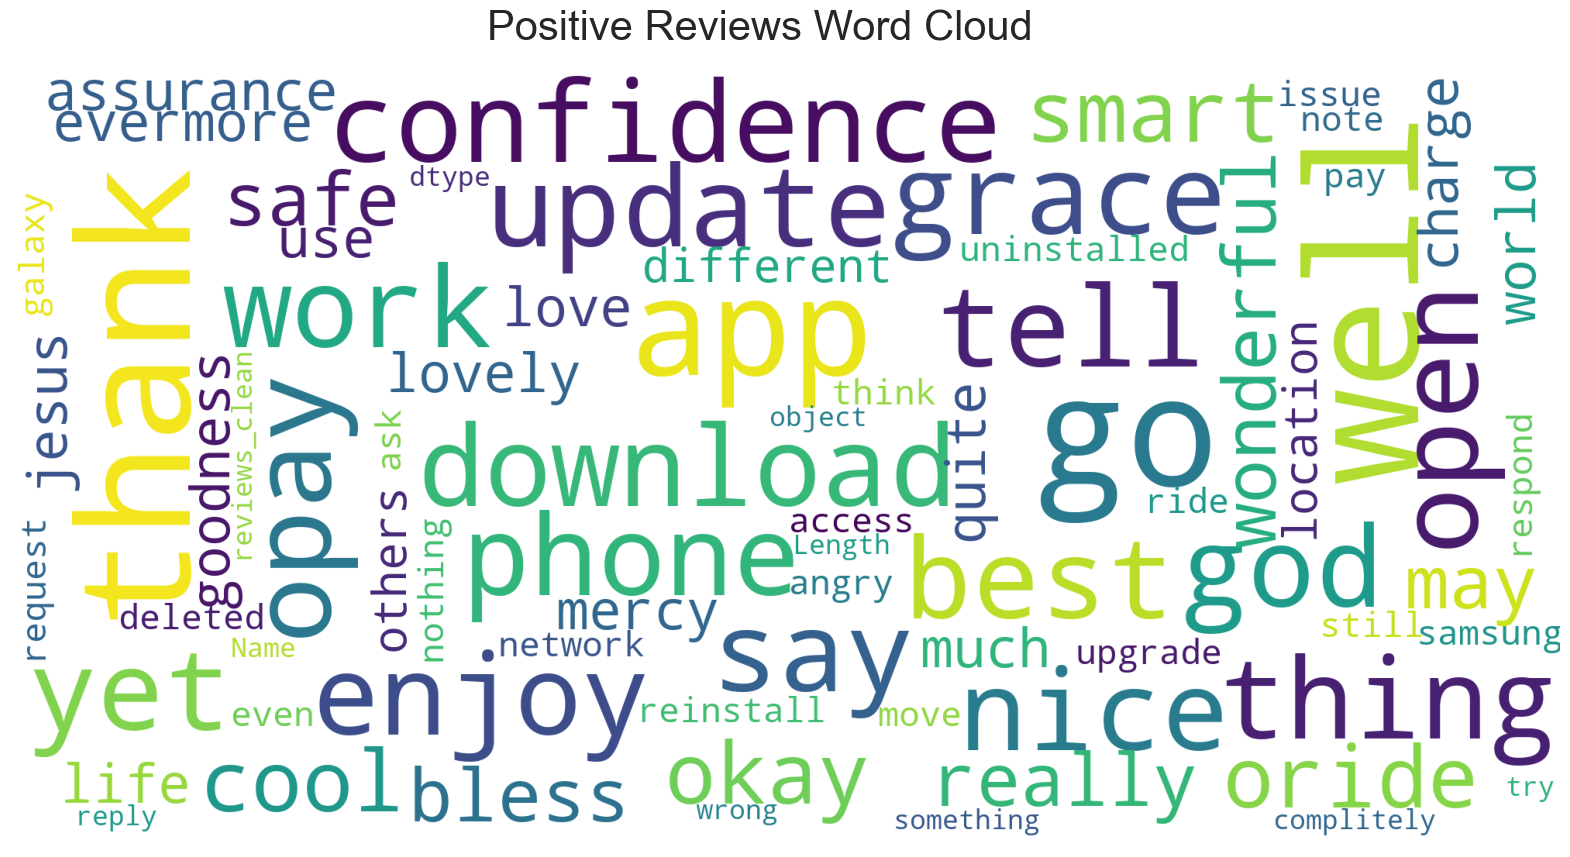

In [93]:
df_highest = df_class[df_class["num_words"] >=8].sort_values("pos", ascending = False)[["reviews_clean", "pos"]]
print("Positive Review Preview")
print(df_highest['reviews_clean'].head(10))
# print wordcloud
wd_title = 'Positive Reviews Word Cloud'
show_wordcloud(df_highest["reviews_clean"], title = wd_title)

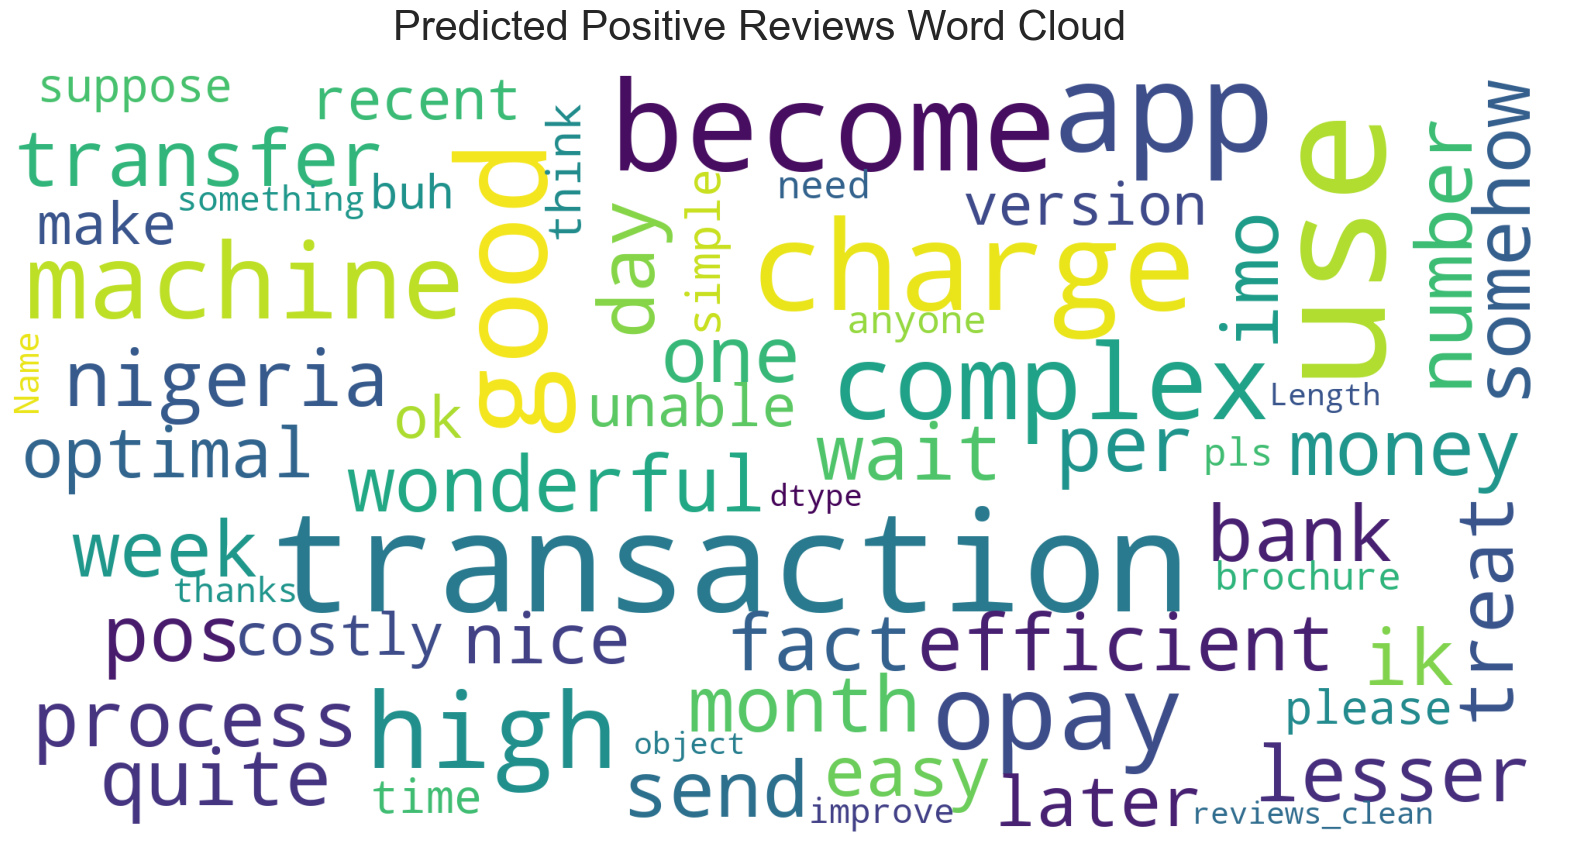

In [94]:
# print wordcloud
wd_title = 'Predicted Positive Reviews Word Cloud'
show_wordcloud(dfn_pred_good['reviews_clean'], title = wd_title)

Negative Review Preview
7071     difficult pay stress pay app absolutely regret downloading                               
4600     app refuse load,while download stop refuse continue bad                                  
112      stupid network fake network frauster use fake fake original wickedness                   
42777    horrible star rating i'd give app poor customer service poor service poor poor poor      
10836    scam never food take get food cancel reject steal money scam black                       
24125    bad baddo baddest regret work orider ilorin ahahhaha slavery mean modern slavery         
1448     fake app network connection waste mb useless app                                         
20357    terrible log let alone register battle week keep send verification code wrong incompetent
42772    rider bad didnt pick order ask pay bad                                                   
12331    people really frustrated rider keep reject order really disappointed        

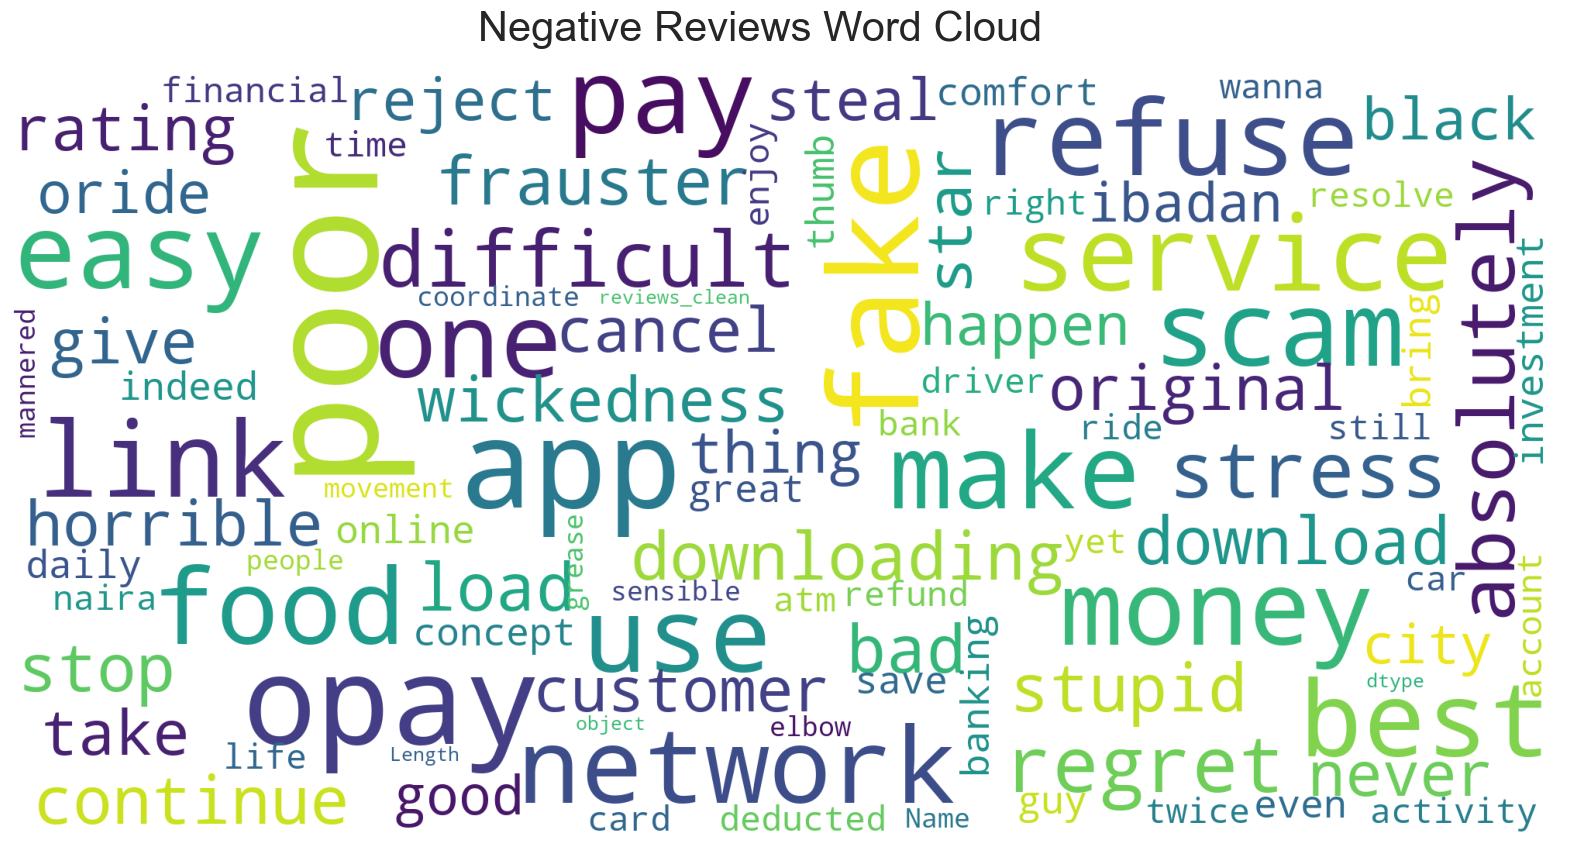

In [95]:
# lowest negative sentiment reviews (with more than 5 words)
df_lowest = df_class[df_class["num_words"] >= 8].sort_values("neg", ascending = False)[["reviews_clean", "neg"]]
print('Negative Review Preview')
print(df_lowest['reviews_clean'].head(10))

# print wordcloud
wd_title = 'Negative Reviews Word Cloud'
show_wordcloud(df_lowest["reviews_clean"], title = wd_title)

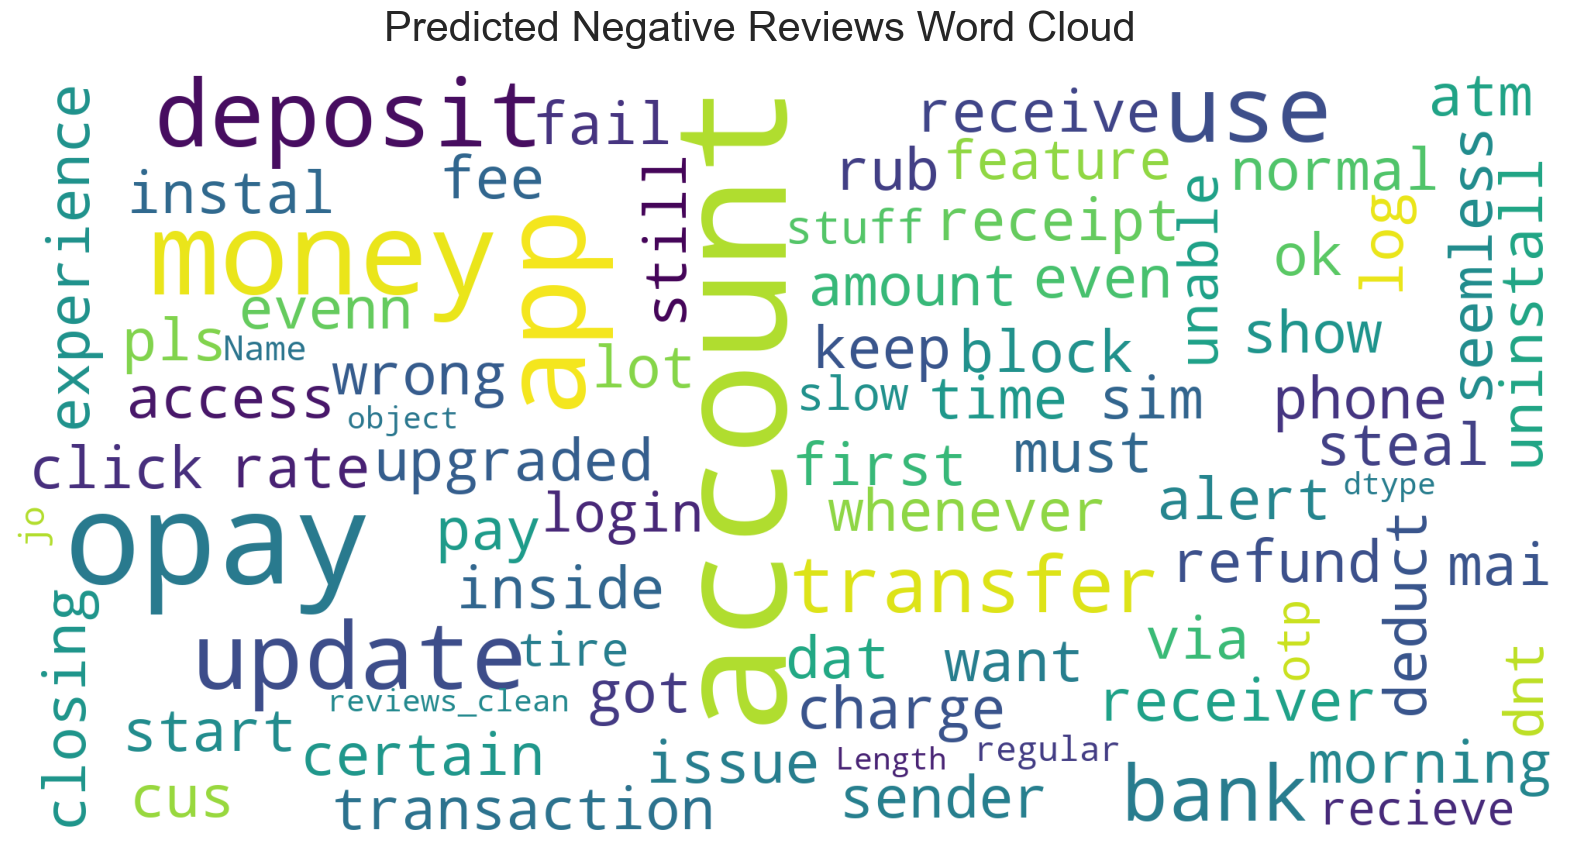

In [96]:
# print wordcloud
wd_title = 'Predicted Negative Reviews Word Cloud'
show_wordcloud(dfn_pred_bad['reviews_clean'], title = wd_title)